# Imports

In [2]:
import sys
import numpy as np

In [3]:
from src.convolution import step_function, step_functions, function_norm, convolution_integrand, convolution
from src.spectrum import Spectrum, from_str, from_csv, SpectrumValueType
from src.paths import project_dir

In [4]:
# plotting
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

In [5]:
!python -V

Python 3.11.4


# Step function

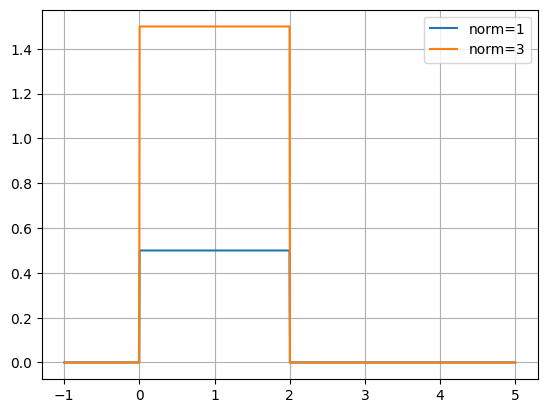

In [6]:
xvalues = np.linspace(start=-1, stop=5, num=1000)
xvalues_for_integration = step_functions(xvalues)
fig, ax = plt.subplots()
ax.plot(xvalues, step_functions(xvalues), label="norm=1")
ax.plot(xvalues, step_functions(xvalues, norm=3), label="norm=3")
ax.grid();
ax.legend();

In [31]:
from sympy import symbols, Piecewise

# Define the variable
x = symbols('x')

# Define the piecewise function
piecewise_function = Piecewise((0.5, (x > 0) & (x < 2)), (0, True))

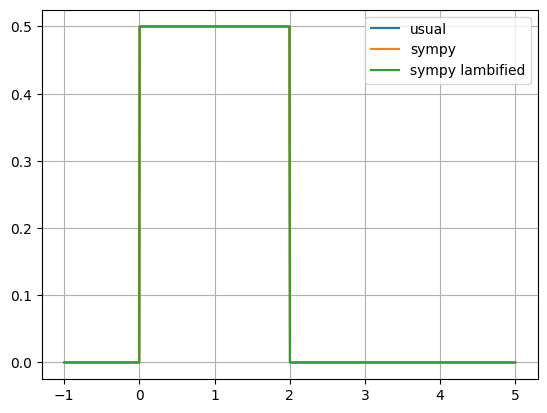

In [16]:
from sympy import lambdify
fig, ax = plt.subplots()
ax.plot(xvalues, step_functions(xvalues), label="usual")
ax.plot(xvalues, [piecewise_function.subs(x,xvalue) for xvalue in xvalues], label="sympy")
ax.plot(xvalues, lambdify(x, piecewise_function, 'numpy')(xvalues), label="sympy lambified")
ax.grid();
ax.legend();

## Norm

In [17]:
function_norm(step_function, lower_limit=-1, upper_limit=3)

1.0

In [19]:
function_norm(lambdify(x, piecewise_function, 'numpy'), lower_limit=-1, upper_limit=3)

1.0

In [25]:
from sympy import integrate
integral_result = integrate(piecewise_function, (x, -np.inf, np.inf))
integral_result

1.00000000000000

## Convolution

In [32]:
piecewise_function

Piecewise((0.5, (x > 0) & (x < 2)), (0, True))

In [33]:
# Define the variable
t = symbols('t')

In [57]:
# Define the variable
x = symbols('x')

# Define the piecewise function
f1_function = Piecewise((0.5, (x > 0) & (x < 2)), (0, True))

# Define the variable of convolution
t = symbols('t')

# Define the convolution integrand function
convolution_integrand_f1 = f1_function.subs(x, x - t) * f1_function.subs(x, t)


In [58]:
convolution_integrand_f1

Piecewise((0.5, (t > 0) & (t < 2)), (0, True))*Piecewise((0.5, (t - x > -2) & (t - x < 0)), (0, True))

In [61]:
convolution_integrand_f1.subs(x, 1).subs(t, 0.5)

0.250000000000000

In [62]:
# Define the convolution integrand function
f2_function = integrate(f1_function.subs(x, x - t) * f1_function.subs(x, t), (t, -np.inf, np.inf))
f2_function

-0.25*Max(0, x - 2) + 0.25*Max(0, x - 2, Min(2, x))

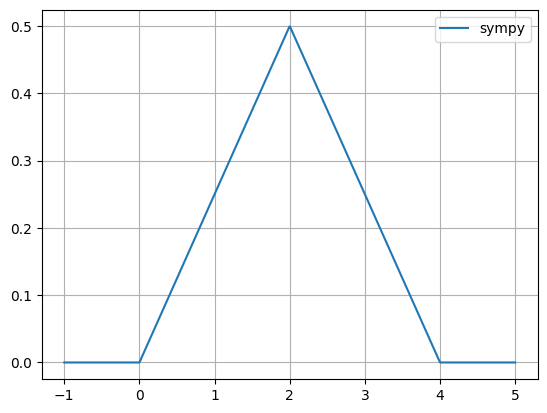

In [64]:
from sympy import lambdify
fig, ax = plt.subplots()
#ax.plot(xvalues, step_functions(xvalues), label="usual")
ax.plot(xvalues, [f2_function.subs(x,xvalue) for xvalue in xvalues], label="sympy")
#ax.plot(xvalues, lambdify(x, f2_function, 'numpy')(xvalues), label="sympy lambified")
ax.grid();
ax.legend();

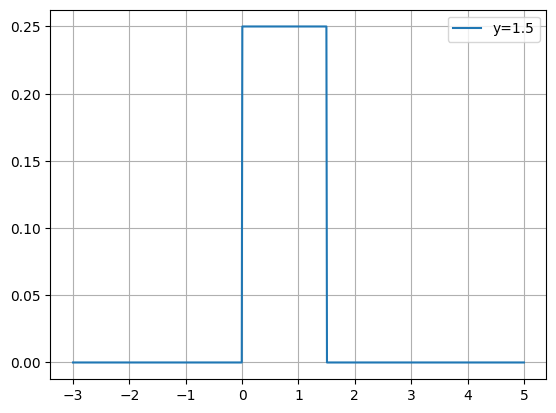

In [26]:
y = 1.5
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

In [9]:
convolution_integrand(step_function)(t=0, y=0, kwargs={'norm': 5, 'lower': -0.5, 'upper': 0.5})

25.0

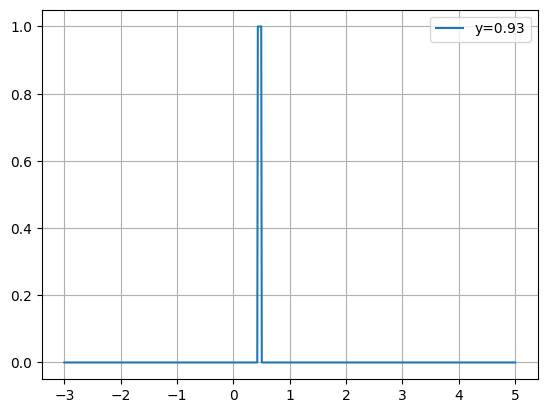

In [10]:
y = 0.93
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y, kwargs={'norm': 1, 'lower': -0.5, 'upper': 0.5}) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

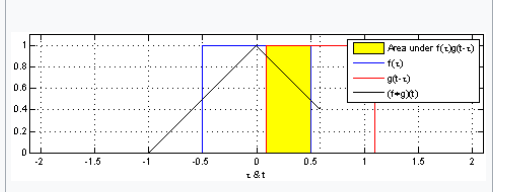
From https://en.wikipedia.org/wiki/Convolution

### On a road to proper integration procedure

/home/grzanka/workspace/widma/src/convolution.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(func=integrand, a=lower_limit, b=upper_limit, args=(y, integrand_args), *args, **kwargs)


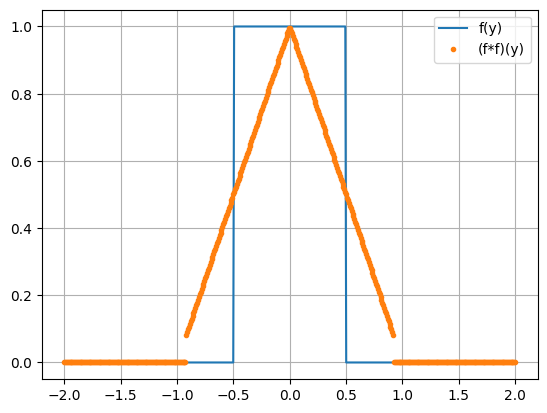

In [11]:
# plotting limits
y_values = np.linspace(start=-2, stop=2, num=500)
# default integration settings, we are not convering
step_function_args = (1,-0.5,0.5,0)
convolution_integration_limits = (-np.inf, np.inf)
integral_kwargs = {}
convolution_values = np.array([convolution(step_function,lower_limit=convolution_integration_limits[0], upper_limit=convolution_integration_limits[1], kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

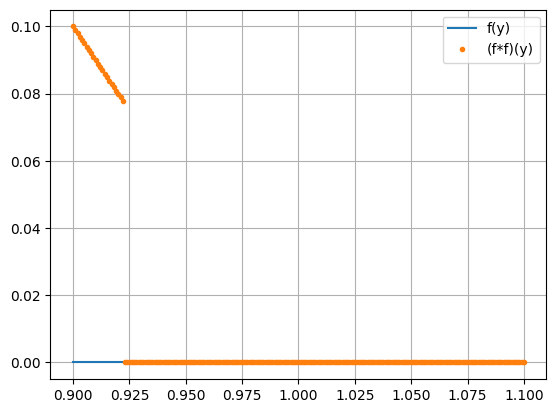

In [12]:
# plotting limits, lets zoom
y_values = np.linspace(start=0.9, stop=1.1, num=200)
# default integration settings, we are not convering
step_function_args = (1,-0.5,0.5,0)
convolution_integration_limits = (-np.inf, np.inf)
integral_kwargs = {}
convolution_values = np.array([convolution(step_function,lower_limit=convolution_integration_limits[0], upper_limit=convolution_integration_limits[1], kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

In [13]:
# lets investigate one point
y = 0.95
step_function_args = (1,-0.5,0.5,0)
c, abserr = convolution(step_function, kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)
c, abserr

(0.0, 0.0)

In [14]:
# lets investigate one point, now with some tricks
y = 0.95

# replace zero with sys.float_info.min
step_function_args = (1,-0.5,0.5,sys.float_info.min) 

# add more points to the integral covering the expected domain
expected_conv_domain = (-1,1)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}

# integrate the step function over explicit domain
convolution_integration_limits = (-100,100)

c, abserr = convolution(
    step_function, 
    lower_limit=convolution_integration_limits[0],
    upper_limit=convolution_integration_limits[1],
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)
c, abserr

(0.050000000000000086, 5.551115123125793e-17)

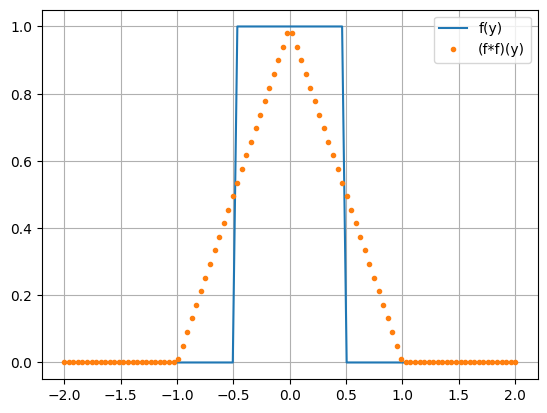

In [15]:
# plotting limits
y_values = np.linspace(start=-2, stop=2, num=100)
# tricks needed to make the integral converge
step_function_args = (1,-0.5,0.5,sys.float_info.min)
expected_conv_domain = (-1,1)
convolution_integration_limits = (-100,100)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

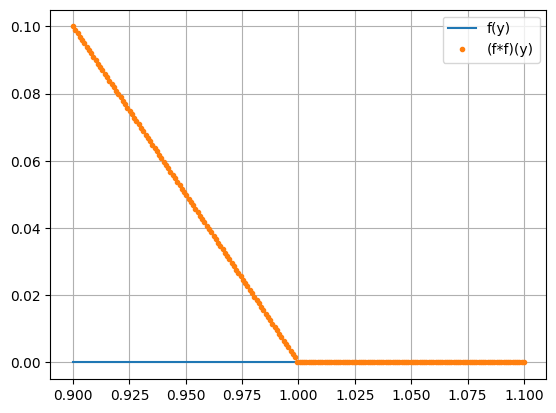

In [16]:
# and a zoom
y_values = np.linspace(start=0.9, stop=1.1, num=200)
# tricks needed to make the integral converge
step_function_args = (1,-0.5,0.5,sys.float_info.min)
expected_conv_domain = (-1,1)
convolution_integration_limits = (-100,100)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

### TODO
one could think of calculating of interval limits bases on function domain

### Checking first moments

f1_1st_moment=1.00, f2_1st_moment=2.00


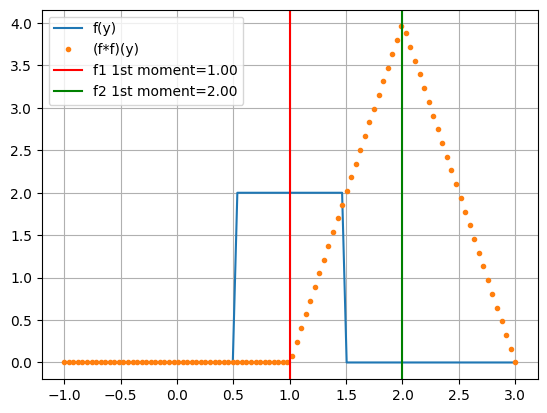

In [17]:
# plotting limits
y_values = np.linspace(start=-1, stop=3, num=100)
# tricks needed to make the integral converge
step_function_args = (2,0.5,1.5,sys.float_info.min)
expected_conv_domain = (0,4)
convolution_integration_limits = (0,2)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

from src.helpers import first_moment
f1_1st_moment = first_moment(bin_centers=y_values, bin_values=step_functions(y_values, *step_function_args))
f2_1st_moment = first_moment(bin_centers=y_values, bin_values=convolution_values)
print(f"f1_1st_moment={f1_1st_moment:2.2f}, f2_1st_moment={f2_1st_moment:2.2f}")

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.axvline(f1_1st_moment, color='r', label=f"f1 1st moment={f1_1st_moment:2.2f}")
ax.axvline(f2_1st_moment, color='g', label=f"f2 1st moment={f2_1st_moment:2.2f}")
ax.grid();
ax.legend();


# Spectrum

## Data

In [18]:
spectrum = from_csv(project_dir / 'data' / 'interim' / 'data.csv', delimiter=',', value_type=SpectrumValueType.yfy)
spectrum.norm

0.9938634018608192

In [19]:
spectrum.yfy.min(), spectrum.yfy.max()

(-0.0008956877263814889, 0.4982137261046694)

In [20]:
spectrum.yfy.clip(min=0).min(), spectrum.yfy.clip(min=0).max()

(0.0, 0.4982137261046694)

In [21]:
spectrum_clipped = Spectrum(bin_centers=spectrum.bin_centers, bin_values_yfy=spectrum.yfy.clip(min=0))
spectrum_clipped.yfy.min(), spectrum_clipped.yfy.max()

(0.0, 0.4982137261046694)

In [22]:
xvalues = np.geomspace(start=spectrum_clipped.bin_edges[0]/2, stop=spectrum_clipped.bin_edges[-1]*2, num=1000)
values_fy = spectrum_clipped.bin_values(xvalues, spectrum_value_type=SpectrumValueType.fy)
values_yfy = spectrum_clipped.bin_values(xvalues, spectrum_value_type=SpectrumValueType.yfy)
values_ydy = spectrum_clipped.bin_values(xvalues, spectrum_value_type=SpectrumValueType.ydy)

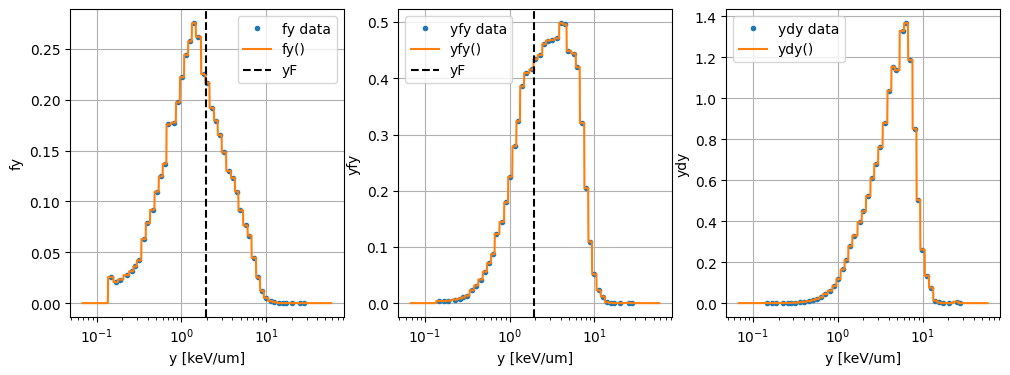

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum_clipped.y, spectrum_clipped.fy, '.', label='fy data')
ax[0].plot(xvalues, values_fy, label='fy()')
ax[0].axvline(spectrum_clipped.yF, color='k', linestyle='--', label='yF')
ax[0].set_ylabel('fy')
ax[1].plot(spectrum_clipped.y, spectrum_clipped.yfy, '.', label='yfy data')
ax[1].plot(xvalues, values_yfy, label='yfy()')
ax[1].axvline(spectrum_clipped.yF, color='k', linestyle='--', label='yF')
ax[1].set_ylabel('yfy')
ax[2].plot(spectrum_clipped.y, spectrum_clipped.ydy, '.', label='ydy data')
ax[2].plot(xvalues, values_ydy, label='ydy()')
ax[2].set_ylabel('ydy')
for a in ax:
    a.set_xscale('log')
    #a.set_yscale('log')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()
    #a.set_xlim(0, 20)

## Normalization

In [24]:
pdf_function = lambda x : spectrum_clipped.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function, lower_limit=spectrum_clipped.bin_edges[0], upper_limit=spectrum_clipped.bin_edges[-1])

/home/grzanka/workspace/widma/src/convolution.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(func=func, a=lower_limit, b=upper_limit, args=args)


0.9870827697855141

In [25]:
pdf_function = lambda x : spectrum_clipped.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function)

0.9937516998520008

In [26]:
function_norm(spectrum_clipped.bin_value, args=(SpectrumValueType.fy,))

0.9937516998520008

## Folding

### Single values

In [27]:
f1_function = lambda x : spectrum_clipped.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
f1_function(2)

0.21672449170916908

In [28]:
convolution(
    f1_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(4)

(0.05999045341048553, 1.4630994339681624e-08)

### Domain and plotting

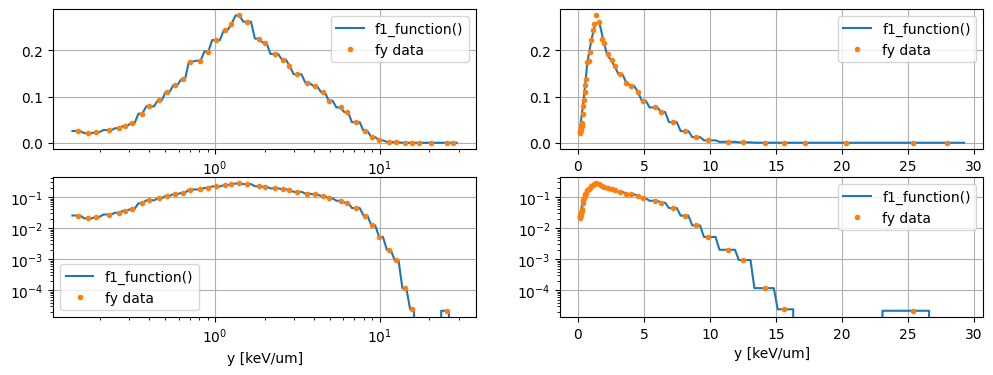

In [29]:
xvalues_geom = np.geomspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1], num=100)
xvalues_lin = np.linspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1], num=100)
yvalues_geom = f1_function(xvalues_geom)
yvalues_lin = f1_function(xvalues_lin)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
ax[0][0].plot(xvalues_geom, yvalues_geom, label='f1_function()')
ax[0][0].set_xscale('log')
ax[0][1].plot(xvalues_lin, yvalues_lin, label='f1_function()')
ax[1][0].plot(xvalues_geom, yvalues_geom, label='f1_function()')
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][1].plot(xvalues_lin, yvalues_lin, label='f1_function()')
ax[1][1].set_yscale('log')
for a in ax.flatten():
    a.plot(spectrum_clipped.y, spectrum_clipped.fy, '.', label='fy data')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()

In [30]:
expected_conv_domain = (spectrum_clipped.bin_edges[0]*2,spectrum_clipped.bin_edges[-1]*2.)
xvalues_for_integration = np.geomspace(start=expected_conv_domain[0], stop=expected_conv_domain[1], num=200)

convolution_integration_limits = (spectrum_clipped.bin_edges[0],spectrum_clipped.bin_edges[-1])
integral_kwargs = {'limit': 800, 'points': np.geomspace(*convolution_integration_limits,400)}
#integral_kwargs = {}
f2_values = [convolution(
    f1_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y) for y in xvalues_for_integration]

/home/grzanka/workspace/widma/src/convolution.py:34: IntegrationWarning: The maximum number of subdivisions (800) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(func=integrand, a=lower_limit, b=upper_limit, args=(y, integrand_args), *args, **kwargs)


In [31]:
for x,y in zip(xvalues_for_integration, f2_values):
    print(f"f2({x:g})={y[0]:g} +- {y[1]:g}")

f2(0.272609)=0 +- 0
f2(0.280064)=4.87571e-06 +- 6.25164e-09
f2(0.287723)=9.88684e-06 +- 3.58952e-09
f2(0.295591)=1.47545e-05 +- 8.24354e-09
f2(0.303675)=1.80341e-05 +- 7.81165e-09
f2(0.31198)=2.14026e-05 +- 1.35977e-08
f2(0.320512)=2.5625e-05 +- 1.45111e-08
f2(0.329277)=3.05092e-05 +- 1.32893e-08
f2(0.338282)=3.54936e-05 +- 9.44228e-09
f2(0.347533)=4.12433e-05 +- 1.38349e-08
f2(0.357037)=4.84042e-05 +- 1.48216e-08
f2(0.366802)=5.57688e-05 +- 8.73524e-09
f2(0.376833)=6.29688e-05 +- 1.35863e-08
f2(0.387138)=7.19387e-05 +- 6.45515e-09
f2(0.397726)=8.18406e-05 +- 1.78044e-09
f2(0.408602)=9.20711e-05 +- 1.27366e-08
f2(0.419777)=0.000104874 +- 1.48134e-08
f2(0.431257)=0.000118224 +- 1.30112e-08
f2(0.44305)=0.00013402 +- 1.43727e-08
f2(0.455167)=0.000151676 +- 1.45773e-08
f2(0.467615)=0.000169605 +- 5.41064e-09
f2(0.480403)=0.00019417 +- 1.15345e-08
f2(0.493541)=0.000228146 +- 1.17879e-08
f2(0.507038)=0.000261047 +- 1.46346e-08
f2(0.520904)=0.000299108 +- 4.65012e-09
f2(0.535149)=0.000347265 

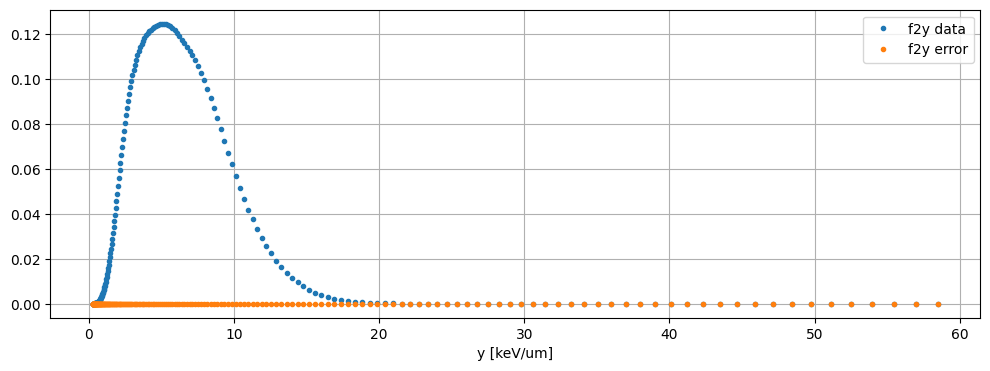

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
ax.plot(xvalues_for_integration, [item[0] for item in f2_values], '.', label='f2y data')
ax.plot(xvalues_for_integration, [item[1] for item in f2_values], '.', label='f2y error')
ax.grid()
ax.set_xlabel('y [keV/um]')
ax.legend()
#ax.set_xscale('log')
#ax.set_yscale('log')

In [33]:
# step_function_args = (), #(sys.float_info.min)
# expected_conv_domain = (-spectrum.bin_edges[0] / 10,spectrum.bin_edges[-1] * 10)
# convolution_integration_limits = (-spectrum.bin_edges[0] / 10,spectrum.bin_edges[-1] * 10)
# integral_kwargs = {'limit': 2000, 'points': np.geomspace(*expected_conv_domain,100)}
# f1_function = lambda x : spectrum.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
# convolution_values = np.array([convolution(
#     f1_function,
#     lower_limit=convolution_integration_limits[0], 
#     upper_limit=convolution_integration_limits[1], 
#     kwargs=integral_kwargs)(y=y)[0] for y in y_values])

In [34]:
f2_spectrum = Spectrum(bin_centers=xvalues_for_integration, bin_values_fy=np.array([item[0] for item in f2_values]))

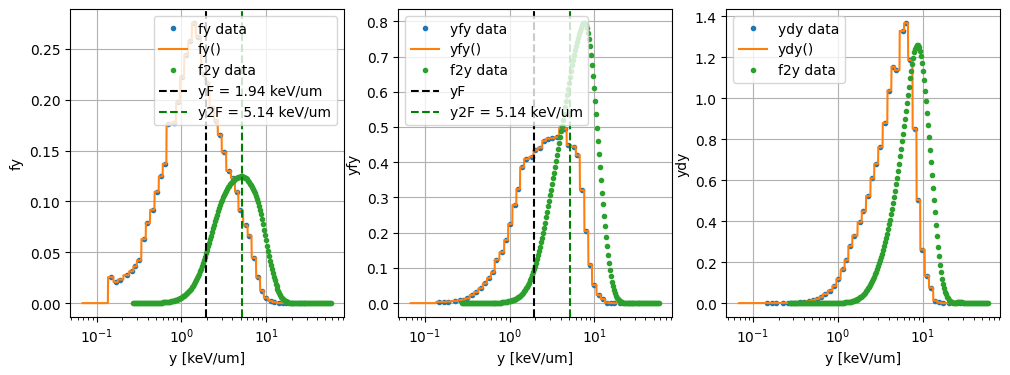

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum_clipped.y, spectrum_clipped.fy, '.', label='fy data')
ax[0].plot(xvalues, values_fy, label='fy()')
ax[0].plot(f2_spectrum.y, f2_spectrum.fy, '.', label='f2y data')
ax[0].axvline(spectrum_clipped.yF, color='k', linestyle='--', label=f'yF = {spectrum_clipped.yF:.2f} keV/um')
ax[0].axvline(f2_spectrum.yF, color='g', linestyle='--', label=f'y2F = {f2_spectrum.yF:.2f} keV/um')
ax[0].set_ylabel('fy')
ax[1].plot(spectrum_clipped.y, spectrum_clipped.yfy, '.', label='yfy data')
ax[1].plot(xvalues, values_yfy, label='yfy()')
ax[1].plot(f2_spectrum.y, f2_spectrum.yfy, '.', label='f2y data')
ax[1].axvline(spectrum_clipped.yF, color='k', linestyle='--', label='yF')
ax[1].axvline(f2_spectrum.yF, color='g', linestyle='--', label=f'y2F = {f2_spectrum.yF:.2f} keV/um')
ax[1].set_ylabel('yfy')
ax[2].plot(spectrum_clipped.y, spectrum_clipped.ydy, '.', label='ydy data')
ax[2].plot(xvalues, values_ydy, label='ydy()')
ax[2].plot(f2_spectrum.y, f2_spectrum.ydy, '.', label='f2y data')
ax[2].set_ylabel('ydy')
for a in ax:
    a.set_xscale('log')
    #a.set_yscale('log')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()
#    a.set_xlim(10, 20)

### First moment

In [36]:
from src.helpers import first_moment
f1_1st_moment = first_moment(bin_centers=xvalues_geom, bin_values=f1_function(xvalues_geom))
#f1_1st_moment = first_moment(bin_centers=xvalues_lin, bin_values=f1_function(xvalues_lin))
f2_1st_moment = first_moment(bin_centers=xvalues_for_integration, bin_values=np.array([item[0] for item in f2_values]))
print(f"f1_1st_moment={f1_1st_moment:2.2f}, f2_1st_moment={f2_1st_moment:2.2f}")

f1_1st_moment=1.93, f2_1st_moment=5.14


In [37]:
xvalues_geom = np.geomspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1], num=100)
f1_1st_moment = first_moment(bin_centers=xvalues_geom, bin_values=f1_function(xvalues_geom))
print(f"first moment {f1_1st_moment:2.3f}")

first moment 1.933


In [38]:
xvalues_geom = np.geomspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1], num=1000)
f1_1st_moment = first_moment(bin_centers=xvalues_geom, bin_values=f1_function(xvalues_geom))
print(f"first moment {f1_1st_moment:2.3f}")

first moment 1.936


In [39]:
xvalues_geom = np.geomspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1]*2, num=1000)
f1_1st_moment = first_moment(bin_centers=xvalues_geom, bin_values=f1_function(xvalues_geom))
print(f"first moment {f1_1st_moment:2.3f}")

first moment 1.936


In [40]:
xvalues_geom = np.geomspace(start=spectrum_clipped.bin_edges[0]/20, stop=spectrum_clipped.bin_edges[-1]*20, num=30)
f1_1st_moment = first_moment(bin_centers=xvalues_geom, bin_values=f1_function(xvalues_geom))
print(f"first moment {f1_1st_moment:2.3f}")

first moment 1.900


In [41]:
1.9*2

3.8